<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/b/b6/Proyecto_en_construccion.jpg" width="300px" height="100px" />


# Guía para presentación de proyectos.
> Se especifican los componentes básicos que deberá tener cada proyecto. El proyecto debe ser un problema que se pueda modelar con las herramientas vistas en el módulo. En el caso del primer módulo, optimización.

## 1. PROYECTO MÓDULO 1

 1. Elegir integrantes para proyecto (3). 
 2. Deben elegir un tema para proyecto que se pueda resolver como un problema de optimización (de preferencia relacionado con su carrera). 


## 1.1 Ideas de proyectos:
1. Programación lineal: (con base en el libro Model building in mathematical programming de H. Paul Williams)
 + Planeación de mano de obra.
 + Planeación de producción.
 + Arbitraje usando programación lineal (Financiera) http://www.meiss.com/columbia/en/teaching/1999/fall/B6015/download/lecture05/lec5.pdf
 + Planta de tratamiento de aguas residuales de bajo costo (Ingeniería civil) Numerical Methods for Engineers pg 421
 + Problema de descubrir datos ocultos
 + Optimizar diseño de divisor de voltaje


2. Ajuste de curvas (con base en los datos en https://data.worldbank.org/indicator)
 + Histórico de temperaturas hasta 2016: ajuste de curvas y predicción de temperaturas de 2017 (comparación con datos reales).
 + Por ejemplo, CO2 emissions (kt), Forest area (sq. km), están relacionados con cambio climático. En las emisiones de CO2 parece que en los últimos años la curva tiene tendencia de concavidad hacia abajo, lo que indicaría que las políticas que se estén ejecutando si están teniendo un impacto.
 + Otro ejemplo puede ser Access to electricity (% of population). Se ve que está en constante crecimiento. Se podría estimar cuándo se llegará al 95%.

___
## 2. Entregable.
Los trabajos deben tener los siguientes componentes básicos.

### 2.1 Título del trabajo.
Comportamiento del S&P500 ante la salida de una crísis económica (COVID-19)

### 2.2 Objetivos.
Predecir el comportamiento del valor del índice de las 500 empresas más importantes de EUA en relación con el tiempo, mediante determinar una función que muestra la tendencia y obtener una media que nos de una predicción cercana a lo que podría ocurrir con el valor

> #### 1.1 Objetivo general.

Se busca conocer el cierre del índice del 2022 (Octubre) 
utilizando los datos del comportamiento de su precio en los últimos 252 días comerciales después de las crisis mundiales que se han ido presentando a lo largo de este ultimo año como  la pandemia, la inflación y la guerra de Rusia y Ucrania. 

> #### 1.2 Objetivos específicos

Leer los datos del comportamiento del precio del S&P 500 en relación con los días transcurridos, recopilados en un excel. Graficar los datos obtenidos. Establecer una matriz de columnas x con unos, una matriz de variables x, una matriz para los valores del precio y los valores de Beta. Optimizar la función otorgándonos curvas que describan la función original. Graficar dichas curvas.
Evaluar las funciones obtenidas en un valor de "x" (días) en el futuro. Obtener un valor por grado 2 y un valor por grado 3. Promediar dichos valores para obtener una media la cual será el resultado esperado para la fecha de Octubre 2022.



Referencia:
- https://es.slideshare.net/rosbur/metodologia-objetivos-generales-y-especficos

### 2.3 Modelo que representa el problema.

A partir de los datos del s&p (Leídos de excel) Se realizó una gráfica luego se hace una función de precio la cual toma en cuenta la beta y la prediccion del valor para obtener el precio utilizando la formúla de      "(y-pred)^T * (y-pred)". La matriz de x se conforma por una matríz de unos y x1, x2 o xn, segun sea el grado y la de beta por betas aleatorias ajustadas al grado de la ecuación. 
Minimizamos el error de las matrices según su grado utilizando la función de precio y la beta en x1, x2 y x3.

### 2.4 Solución del problema de optimización.

Las funciones de grado 2 y grado 3 obtenidas se evalúan en la fecha futura, de los dos resultados se hace un promedio y obtuvimos una predicción para el precio del s&p en (octubre 2022) de:

### 2.5 Visualización de la solución del problema.
> Se deben mostrar gráficas y/o tablas que ilustren de forma adecuada los resultados. No olviden etiquetar los ejes y si se tienen varias curvas en una sola gráfica también etiquetarlas (ojo: que las curvas se puedan diferenciar con colores y estilos de línea).



### 2.6 Conclusiones.
 
Obtuvimos una Predicción promedio del precio del s&p utilizando los datos de los últimos 252 días comericales, con la limitante de que se hizo considerando que está función mantendrá su curso y no se verá afectada por algún cambio drástico en la economía mundial. Por lo que sabemos que este precio será cercano al precio real en octubre 2022.


### 2.7 Referencias.

FactSet Research Systems. (n.d.). S@p 500. (septemer, 2022) [Historic price]. Retrieved september 20, 2022, from https://www.factset.com/

___
## 3. Especificaciones adicionales.
El proyecto debe estar disponible en ~~`GitHub`~~ con los integrantes como colaboradores.

### 3.1 Notebook de jupyter. 
> Los anteriores numerales los deben desarrollar todos en un notebook de jupyter y llamarlo de la siguiente manera `ProyectoModulo1_ApellidoN1_ApellidoN2_ApellidoN3`, donde `ApellidoNi` hace referencia al apellido paterno y la inicial del primer nombre del integrante `i`.

### 3.2 Presentación.
> Recuerden que la nota del proyecto es mitad el trabajo, y mitad la presentación. Deben hacer una presentación en PowerPoint para presentar el trabajo en la clase del lunes **26 de septiembre**. La presentación, además de llevar todos los componentes básicos descritos en el entregable, debe llevar una tabla de contenido.
> - **NO DEBE TENER CÓDIGO, PARA ESO ES EL INFORME EN EL NOTEBOOK**
> - Presentación: 10 minutos.
> - Seguir estas recomendaciones: https://es.slideshare.net/MeireComputacion/power-point-pautas-para-una-buen-trabajo

In [3]:
import numpy as np
import pandas as pd
import sympy as sp
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_excel("PriceHistory.xlsx")
DataP = data["Price"]
DataP

0      4357.727866
1      4354.188856
2      4395.637139
3      4448.984053
4      4455.477916
          ...     
248    3946.012382
249    3901.352835
250    3873.334273
251    3899.885942
252    3850.820000
Name: Price, Length: 253, dtype: float64

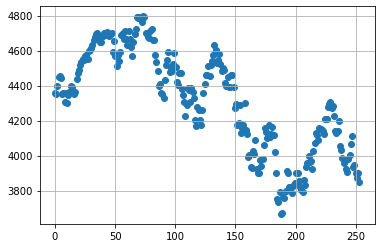

In [5]:
n = len(DataP)
x = np.linspace(0,253,n)
plt.figure()
plt.scatter(x,DataP)
plt.grid()


In [6]:
def funcion_precio(beta, X, y, s):
    beta = np.reshape(beta, [s,-1])
    pred = X @ beta
    precio = (y-pred).T @ (y-pred)
    return precio [0][0]

# Columnas de x con unos:
ones = np.ones([n,1])
x1 = np.reshape(x,[n,-1])
x2 = np.reshape(x**2,[n,-1])
x3 = np.reshape(x**3,[n,-1])

# matrices de variables x

MatX1 = np.hstack((ones,x1))
MatX2 = np.hstack((ones,x1,x2))
MatX3 = np.hstack((ones,x1,x2,x3))

# BETA 
beta1 = np.random.rand(2)
beta2 = np.random.rand(3)
beta3 = np.random.rand(4)

y = np.reshape(list(DataP),[n,-1])
y



array([[4357.72786634],
       [4354.18885569],
       [4395.63713885],
       [4448.98405341],
       [4455.47791588],
       [4443.11040057],
       [4352.63434664],
       [4359.46105752],
       [4307.53875079],
       [4357.03887534],
       [4300.45901202],
       [4345.71622004],
       [4363.54516207],
       [4399.76330792],
       [4391.33805217],
       [4361.19048622],
       [4350.64596787],
       [4363.80450766],
       [4438.2643801 ],
       [4471.36845422],
       [4486.46049234],
       [4519.63061194],
       [4536.19213973],
       [4549.7813469 ],
       [4544.89825268],
       [4566.47800207],
       [4574.78883673],
       [4551.68113535],
       [4596.4150792 ],
       [4605.37664818],
       [4613.67300764],
       [4630.65336098],
       [4660.56958256],
       [4680.05584256],
       [4697.52680549],
       [4701.70204336],
       [4685.25117736],
       [4646.70766757],
       [4649.26920323],
       [4682.84739595],
       [4682.80354371],
       [4700.897

In [7]:
print("Grado 1:",funcion_precio(beta1,MatX1,y,2))
print("Grado 2:",funcion_precio(beta2,MatX2,y,3))
print("Grado 3:",funcion_precio(beta3,MatX3,y,4))

Grado 1: 4498214238.052517
Grado 2: 141733323097.6665
Grado 3: 5033690746797357.0


In [8]:
import scipy.optimize as opt

sol1 = opt.minimize(funcion_precio,beta1,args=(MatX1,y,2))
sol2 = opt.minimize(funcion_precio,beta2,args=(MatX2,y,3))
sol3 = opt.minimize(funcion_precio,beta3,args=(MatX3,y,4))
sol1

      fun: 8790744.936791465
 hess_inv: array([[ 7.85793889e-03, -4.64940094e-05],
       [-4.64940094e-05,  3.67539084e-07]])
      jac: array([0.   , 0.125])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 98
      nit: 6
     njev: 29
   status: 2
  success: False
        x: array([ 4.69901707e+03, -3.07089516e+00])

In [9]:
sol2

      fun: 8313750.676230002
 hess_inv: array([[ 2.07836111e-07, -1.06078371e-08,  4.93138825e-11],
       [-1.06078371e-08,  1.47966157e-06, -7.29590145e-09],
       [ 4.93138825e-11, -7.29590145e-09,  3.83720795e-11]])
      jac: array([ 0.   , -0.125, -0.5  ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 68
      nit: 8
     njev: 17
   status: 2
  success: False
        x: array([ 4.60306757e+03, -7.86344431e-01, -9.02984849e-03])

In [10]:
sol3

      fun: 4845965.102692016
 hess_inv: array([[ 3.03805479e-02, -8.97488944e-04,  7.04677694e-06,
        -1.61420693e-08],
       [-8.97488944e-04,  3.54433218e-05, -3.13866047e-07,
         7.68739053e-10],
       [ 7.04677694e-06, -3.13866047e-07,  2.96903706e-09,
        -7.58340102e-12],
       [-1.61420693e-08,  7.68739053e-10, -7.58340102e-12,
         1.99393295e-14]])
      jac: array([-3.16875000e+01, -3.88293750e+03, -3.37939188e+05,  7.78468688e+05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 387
      nit: 32
     njev: 75
   status: 2
  success: False
        x: array([ 4.30301953e+03,  1.35912068e+01, -1.51421391e-01,  3.75277653e-04])

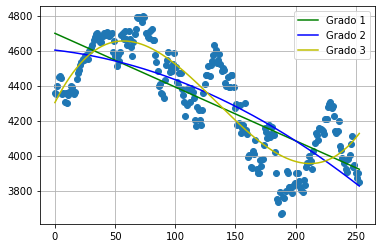

In [11]:
y1 = sol1.x[0] + sol1.x[1]*x
y2 = sol2.x[0] + sol2.x[1]*x + sol2.x[2]*x**2
y3 = sol3.x[0] + sol3.x[1]*x + sol3.x[2]*x**2 + sol3.x[3]*x**3

plt.figure()
plt.scatter(x,DataP)
plt.plot(x,y1,"g", label = "Grado 1")
plt.plot(x,y2,"b", label = "Grado 2")
plt.plot(x,y3,"y", label = "Grado 3")

plt.legend()
plt.grid()

In [12]:
end = len(DataP)+40
end

293

In [13]:
import sympy as sp
sp.var("x")

y2 = sol2.x[0] + sol2.x[1]*x + sol2.x[2]*x**2
y2

-0.00902984849191993*x**2 - 0.786344431473845*x + 4603.06756690835

In [14]:
end_y2 = y2.subs(x,end)
end_y2

3597.46518530368

In [15]:
y3 = sol3.x[0] + sol3.x[1]*x + sol3.x[2]*x**2 + sol3.x[3]*x**3
y3

0.000375277652937729*x**3 - 0.151421390908396*x**2 + 13.5912067623463*x + 4303.01952838694

In [16]:
end_y3 = y3.subs(x,end)
end_y3

4725.51101118545

In [17]:
pred_promedio = (end_y3+end_y2)/2
pred_promedio

4161.48809824457

Link presentación: https://www.canva.com/design/DAFMy-FIpeo/FbvEqXrqMoyoa6VHNQhKAw/edit?utm_content=DAFMy-FIpeo&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton